# Forecast Results Notebook

In this notebook we will try an visualize the forecasting compared to the real time series.

In [1]:
import pandas as pd 
from whale_dataset import WhaleDataset
from torch_geometric_temporal.nn import MTGNN
from config import CONFIG
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch

c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading

Dataset loading

In [2]:
dataset = WhaleDataset(CONFIG.model_config.seq_length - 1)

Loading trained model's wheights

In [3]:
PATH = Path("../") / "artifacts" / "model.pt"
model_config = CONFIG.model_config
model_config.num_nodes = len(dataset.dataframe.columns)
model = MTGNN(**model_config.dict())
model.load_state_dict(torch.load(PATH))
model = model.eval()

## Inferences

In [4]:
y_real = []
y_pred = []
for index in range(len(dataset)):
    x, y = dataset[index]
    y_hat = model(x.unsqueeze(0))
    y_real.append(y.squeeze()[1].cpu().detach().numpy())
    y_pred.append(y_hat.squeeze()[1].cpu().detach().numpy())

y_real = np.array(y_real)
y_pred = np.array(y_pred)

c:\Users\simon\Projets\CountryTrends\src\whale_dataset.py:90: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3281.)
  x = torch.tensor(x).T.float()


## Visualization

For simplicity, we will only visualize the first component of the prediction.

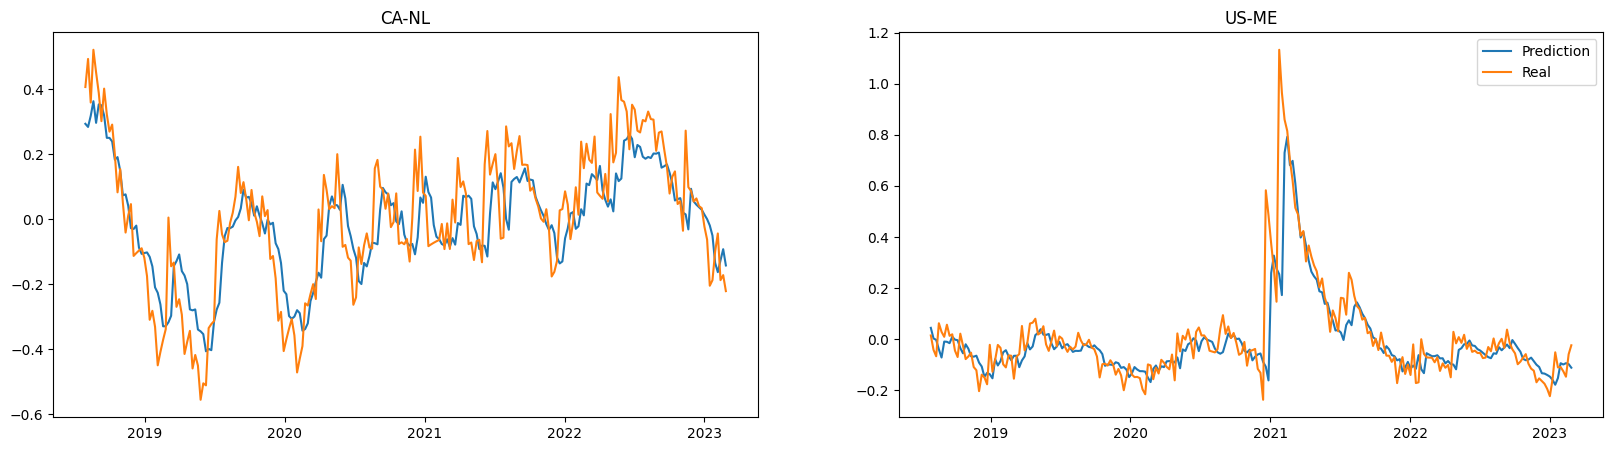

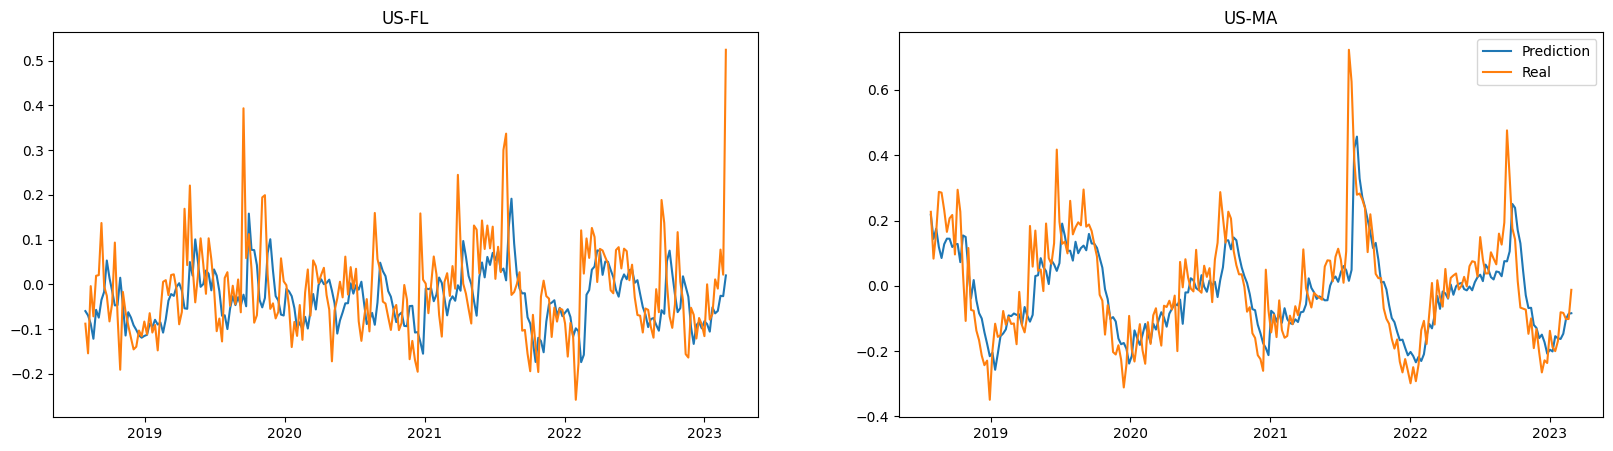

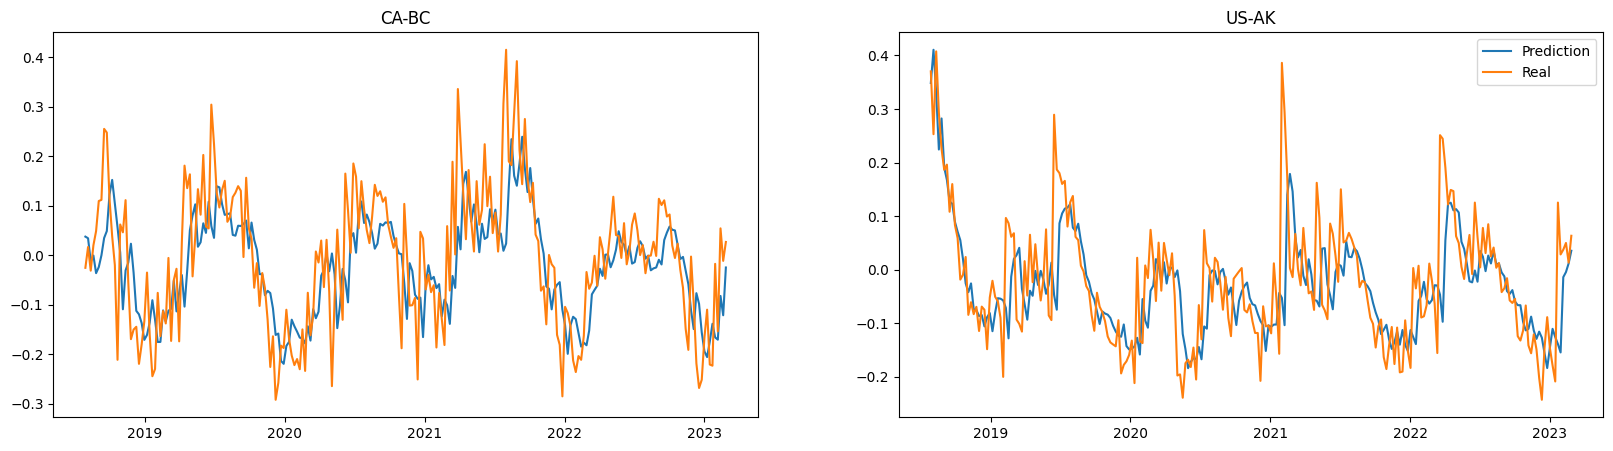

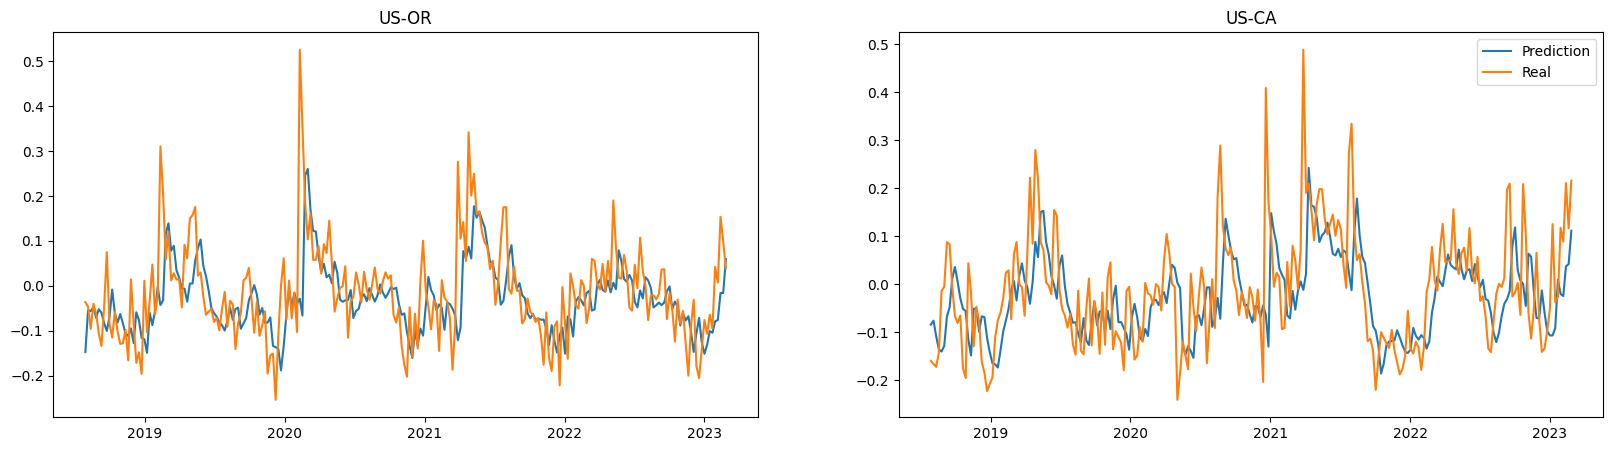

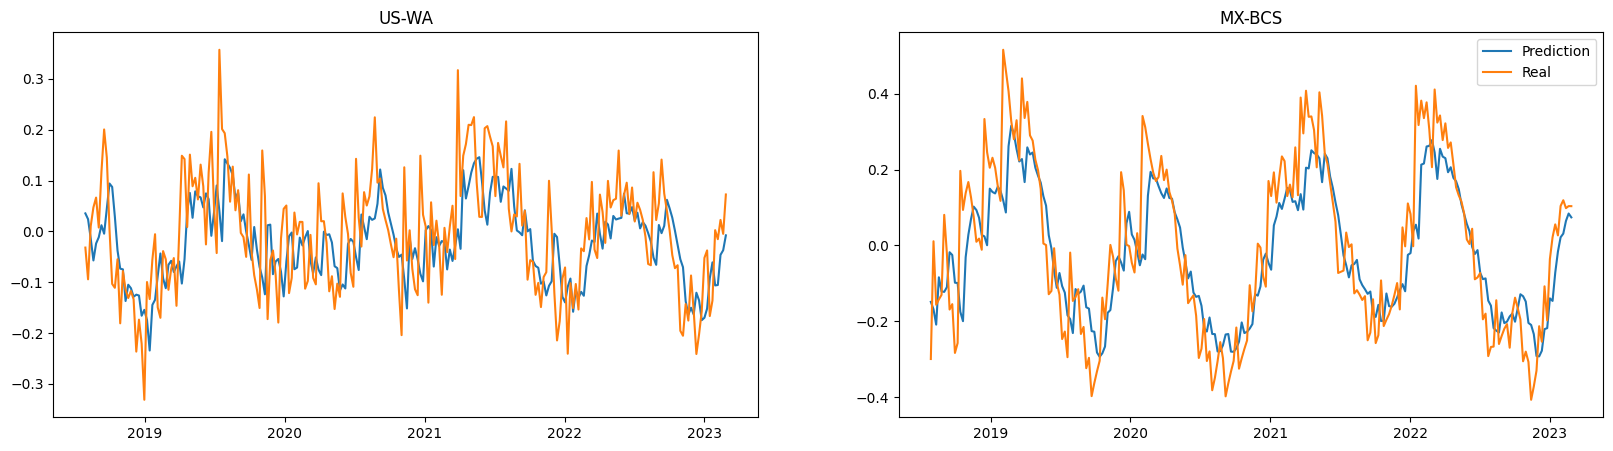

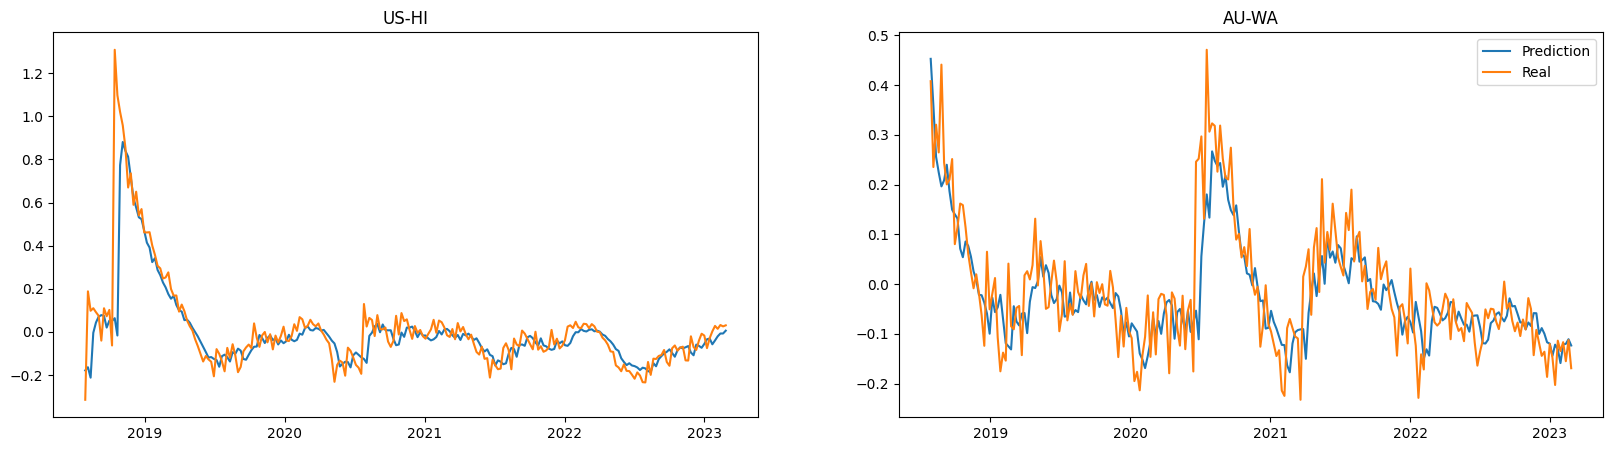

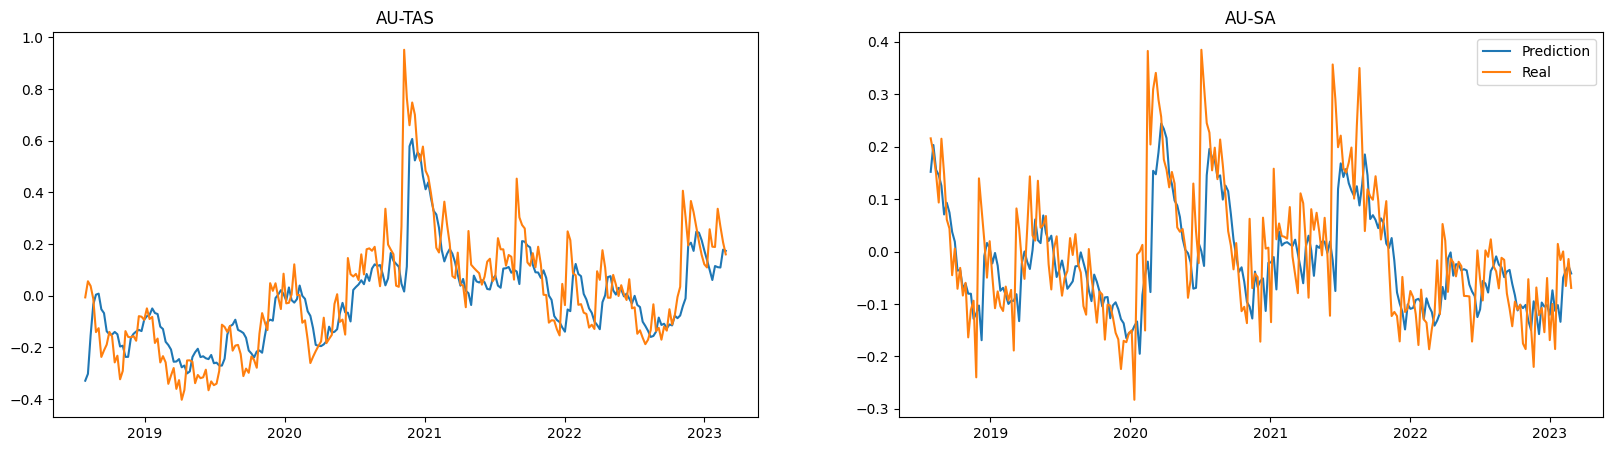

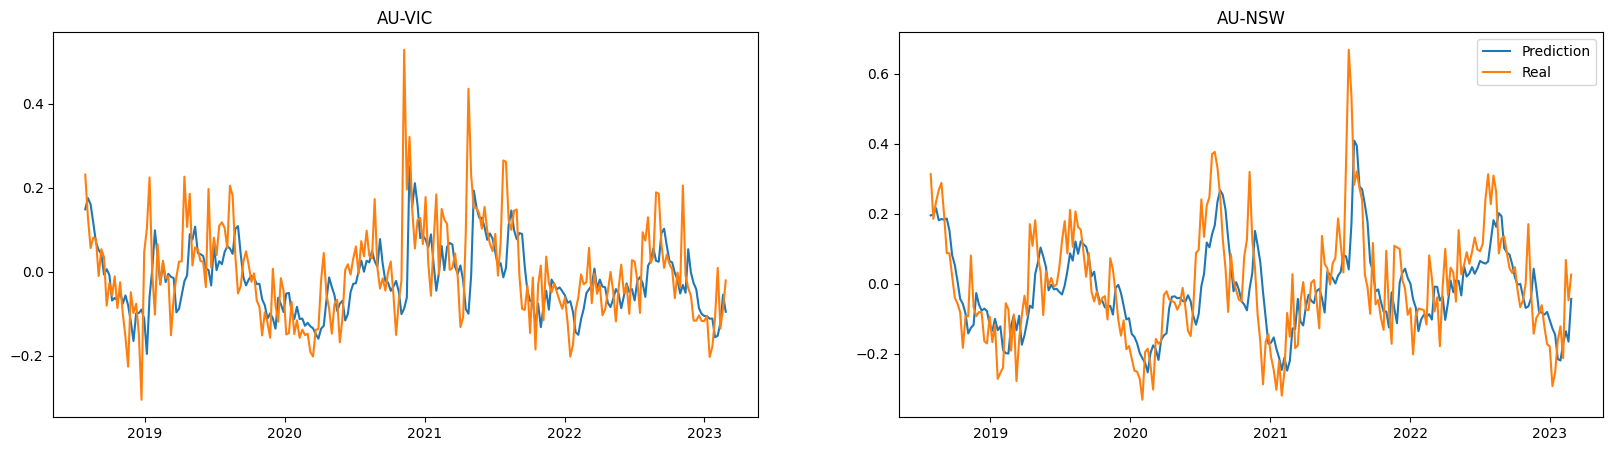

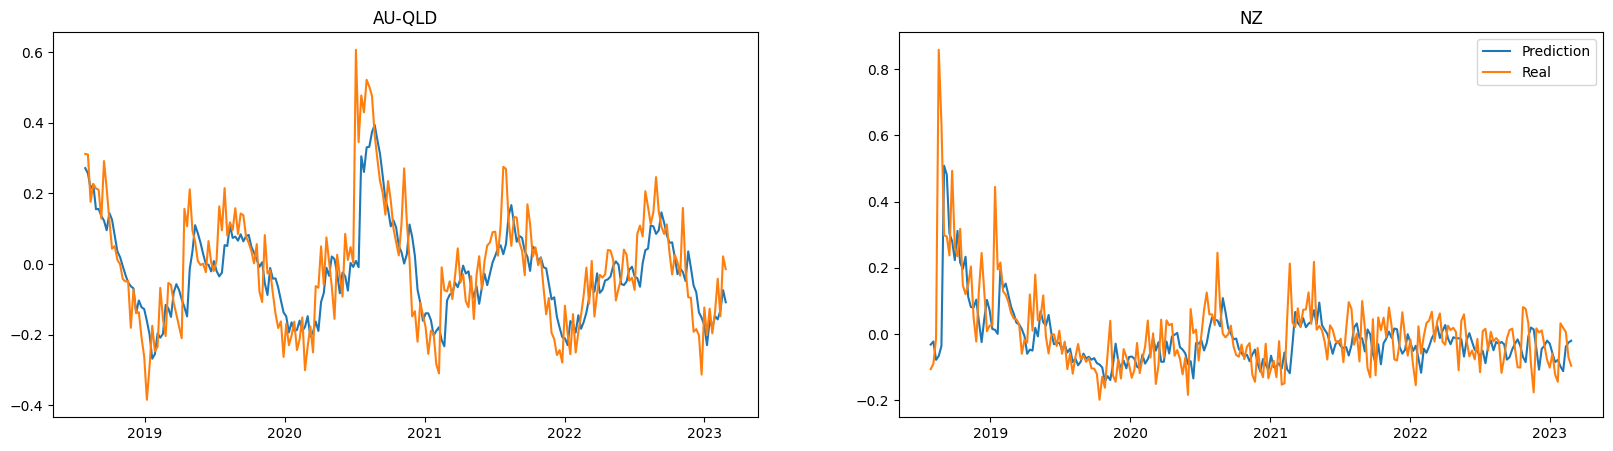

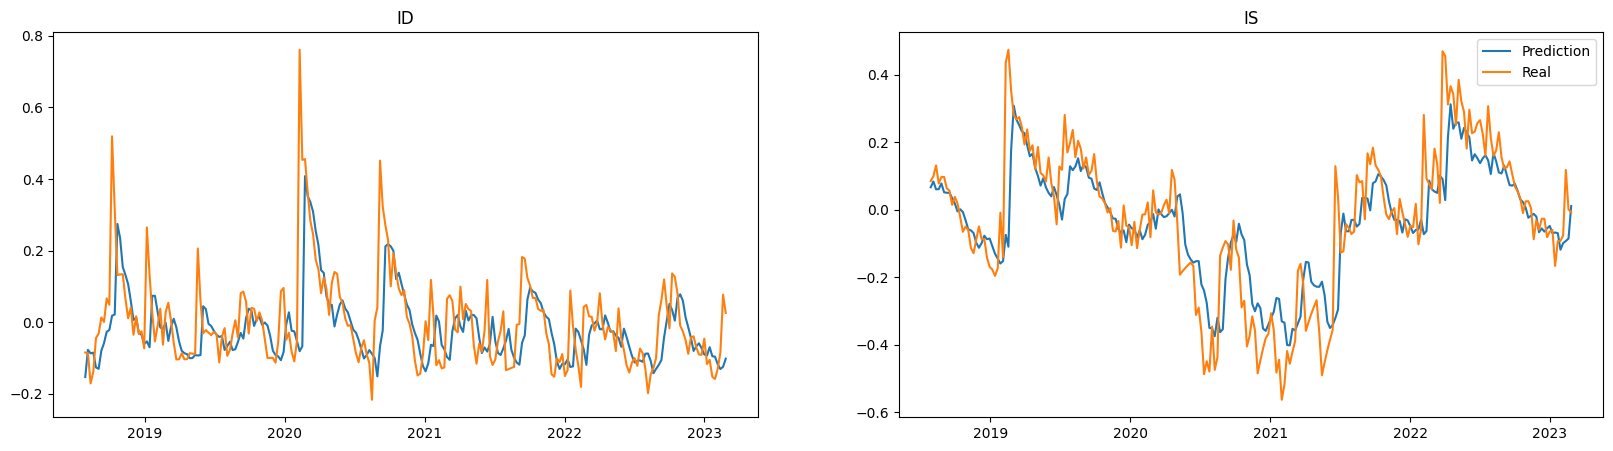

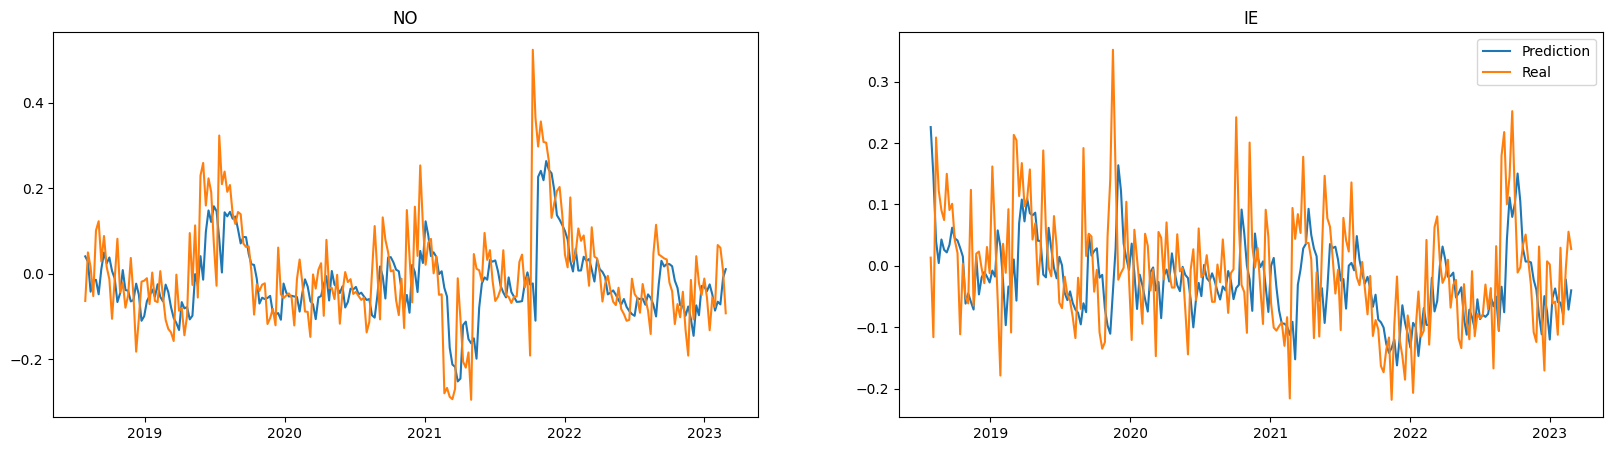

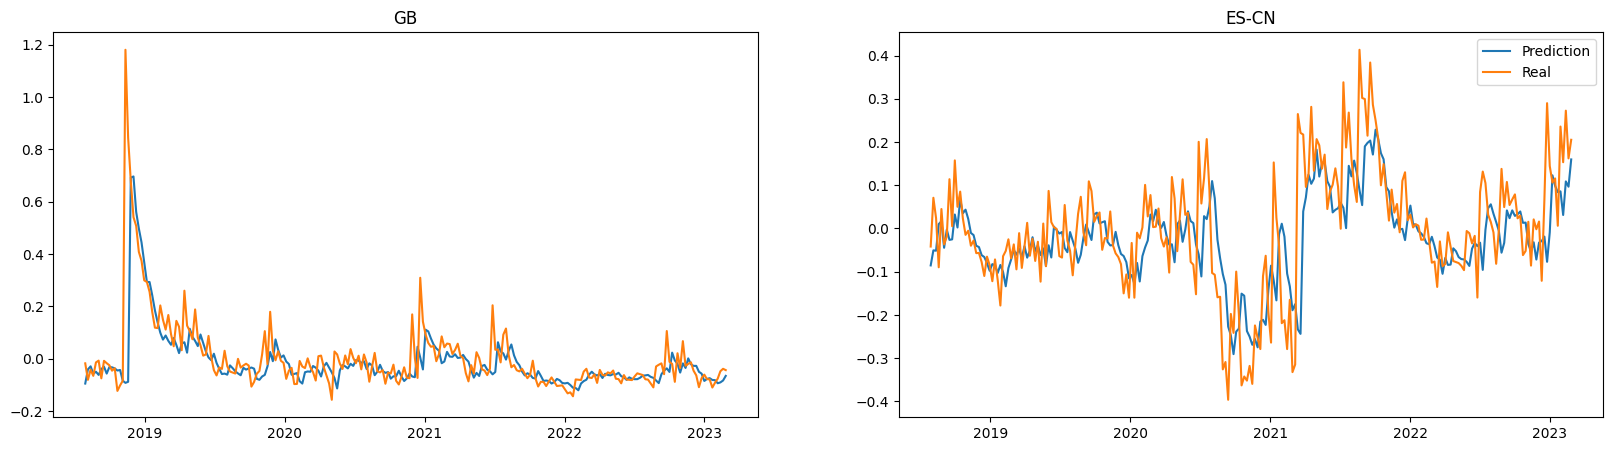

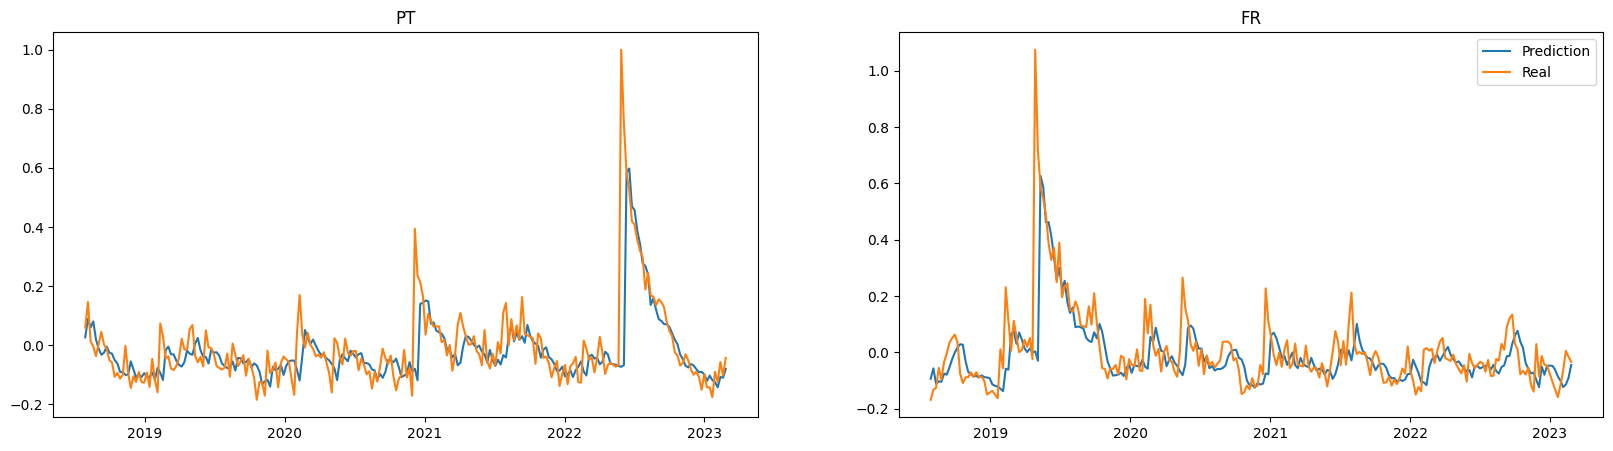

In [5]:
x = dataset.dataframe.index[-y_pred.shape[0]:] # X-axis using datetimes.
columns = dataset.dataframe.columns

for i, c in enumerate(columns):
    if i%2==0:
        plt.figure(figsize=(20,5))
    plt.subplot(1,2,i%2+1)
    plt.plot(x, y_pred[:,i], label="Prediction")
    plt.plot(x, y_real[:,i], label="Real")
    plt.title(c)
    if i%2==1:
        plt.legend()
        plt.show()